# Exercise project 1 (ANN regression)

### Step 0: Importing libraries

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

### Step 1: Reading dataset

In [2]:
df = pd.read_csv("health_fitness_tracking_365days.csv")

df.head(20)

,user_id,age,gender,date,steps,heart_rate_avg,sleep_hours,calories_burned,exercise_minutes,stress_level,weight_kg,bmi
0,0,56,F,2024-09-06,9341,62.029621,9.368819,2230.230419,0.623979,2,73.496429,22.471978
1,0,56,F,2024-09-07,10873,59.062818,6.358311,1840.454777,109.208987,3,68.237867,22.569858
2,0,56,F,2024-09-08,6638,58.494078,6.099619,2284.231946,3.083319,4,81.687890,17.595609
3,0,56,F,2024-09-09,6062,56.546095,7.584023,1620.464266,22.023327,10,86.379884,20.154137
4,0,56,F,2024-09-10,10399,59.507172,7.327957,2264.528312,76.483061,8,81.782982,32.624040
5,0,56,F,2024-09-11,10954,45.373818,5.679113,1660.834309,48.614508,1,72.016433,21.825853
6,0,56,F,2024-09-12,6364,56.087590,8.341498,2226.499339,2.307878,7,79.934268,22.964489
7,0,56,F,2024-09-13,9210,57.063278,6.384425,2353.914903,30.446681,3,56.526881,17.848680
8,0,56,F,2024-09-14,6559,58.082562,6.946261,2469.393097,22.190365,10,71.305706,20.803971
9,0,56,F,2024-09-15,7708,61.817104,5.457826,1574.421061,85.864151,7,72.855055,18.766026


### Step 2: Cleaning up dataset

### I check for missing values and inspect the data types to make sure my dataset is ready for preprocessing.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36500 entries, 0 to 36499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           36500 non-null  int64  
 1   age               36500 non-null  int64  
 2   gender            36500 non-null  object 
 3   date              36500 non-null  object 
 4   steps             36500 non-null  int64  
 5   heart_rate_avg    36500 non-null  float64
 6   sleep_hours       36500 non-null  float64
 7   calories_burned   36500 non-null  float64
 8   exercise_minutes  36500 non-null  float64
 9   stress_level      36500 non-null  int64  
 10  weight_kg         36500 non-null  float64
 11  bmi               36500 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 3.3+ MB


### I convert the 'gender' column into a numerical format using one-hot encoding, so I can use it as input for my neural network.

In [4]:
from sklearn.preprocessing import OneHotEncoder

variables = ['gender']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

#### I remove columns that I don't need for prediction.

In [5]:
df=df.drop(columns={"date","user_id"})
df.head(10)

,age,steps,heart_rate_avg,sleep_hours,calories_burned,exercise_minutes,stress_level,weight_kg,bmi,gender_F,gender_M
0,56,9341,62.029621,9.368819,2230.230419,0.623979,2,73.496429,22.471978,1,0
1,56,10873,59.062818,6.358311,1840.454777,109.208987,3,68.237867,22.569858,1,0
2,56,6638,58.494078,6.099619,2284.231946,3.083319,4,81.687890,17.595609,1,0
3,56,6062,56.546095,7.584023,1620.464266,22.023327,10,86.379884,20.154137,1,0
4,56,10399,59.507172,7.327957,2264.528312,76.483061,8,81.782982,32.624040,1,0
5,56,10954,45.373818,5.679113,1660.834309,48.614508,1,72.016433,21.825853,1,0
6,56,6364,56.087590,8.341498,2226.499339,2.307878,7,79.934268,22.964489,1,0
7,56,9210,57.063278,6.384425,2353.914903,30.446681,3,56.526881,17.848680,1,0
8,56,6559,58.082562,6.946261,2469.393097,22.190365,10,71.305706,20.803971,1,0
9,56,7708,61.817104,5.457826,1574.421061,85.864151,7,72.855055,18.766026,1,0


### Step 3: Train/test/validation split

#### I split my dataset into training, validation, and test sets so I can evaluate my model's performance on new data.

In [6]:
X=df.drop(columns="stress_level")
y=df["stress_level"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

## Step 4: Creating neural network

In [7]:
variable_amount = len(X.columns)
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(18, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.01)),
        layers.Dropout(0.1),
        layers.Dense(8, activation="relu"),
        layers.Dense(12, activation="relu"),
        layers.Dense(1)
    ]
)
model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Deep Learning\DeepLearningLUAS\.venv\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 18)             │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 20 (80.00 B)

#### Here, I build my deep learning model using Keras. I use several dense layers, batch normalization, and dropout to help with regularization.

## Step 5: Fitting data

Epoch 1/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 12.2010 - val_loss: 8.9983
Epoch 2/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.9600 - val_loss: 8.7568
Epoch 3/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.7483 - val_loss: 8.6335
Epoch 4/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.5958 - val_loss: 8.5390
Epoch 5/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.5090 - val_loss: 8.4886
Epoch 6/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.4410 - val_loss: 8.4372
Epoch 7/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.3909 - val_loss: 8.4004
Epoch 8/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.3506 - val_loss: 8.3675
Epoch 9/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.3105 - val_loss: 8.3298
Epoch 10/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.2891 - val_loss: 8.3271
Epoch 11/200
799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.2708 - val_loss: 8.3205
Epoch 12/200
799/799 ━━━━━━━━━━━━━━━━━━━

<Axes: >

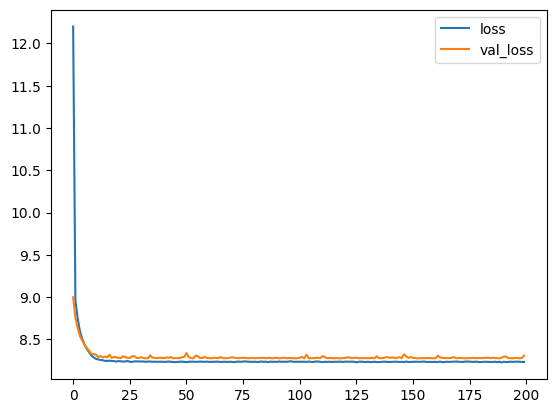

In [8]:
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_val, y_val))

loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### I fit my model to the training data and plot the loss to see how the training process is going.

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step


,Test True Y,Model Predictions
0,3,5.360710
1,3,5.320594
2,7,5.262784
3,10,5.297667
4,4,5.262784
...,...,...
5470,2,5.277376
5471,10,5.262784
5472,7,5.262784
5473,6,5.262784


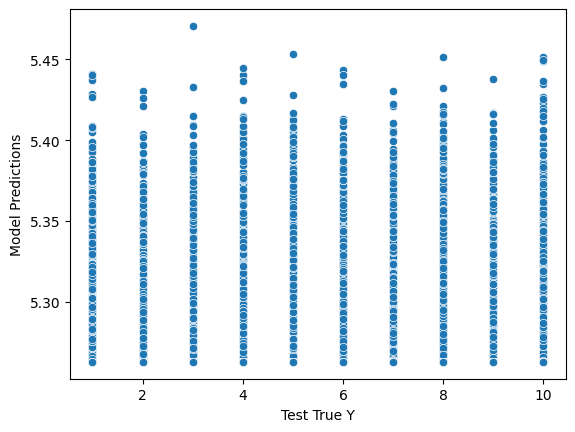

In [9]:
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)
pred_df

#### I use the test set to evaluate how well my model predicts. I also visualize the results with a scatter plot to compare the true and predicted values.
#### The model works horribly, as we can see it only predicts values around 5. I have done lots of revisions on the code so it is likely due to trash data.

C:\Users\avam\AppData\Local\Temp\ipykernel_49420\3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


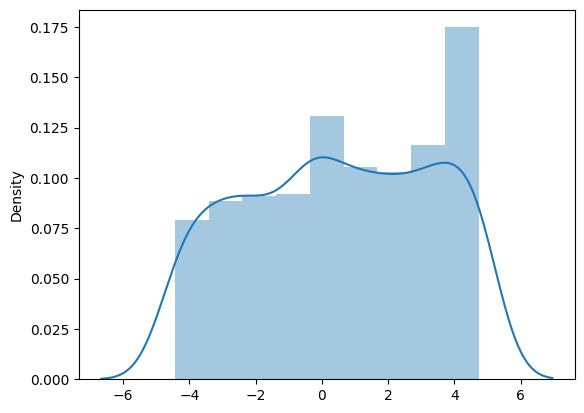

In [10]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

#### I plot the distribution of errors to see how close my model's predictions are to the actual values.

In [11]:
y_pred = model.predict(X_test).argmax(axis=1)
print(y_pred[:20])

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### (Optional) Here I try to get the predicted class index, but for regression this is not needed.

## Step 6: Metrics

In [12]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2))

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2))

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2))

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
2.47

MSE
8.2

RMSE:
2.86

R-squared:
-0.01

Explained variance score:
-0.0


#### I calculate and display different metrics to measure how well my model is performing.
#### Our main value here is R-squared which ranges from 0 to 1 theoritically. It measures the efficiency of the predictions and how well our model fits data, which as we can see is terrible.

### Step 7: Testing with given data

In [13]:
tester_row = {
    'user_id':0,
    'age':17,
    'gender':0,
    'steps':30,
    'heart_rate_avg':120,
    'sleep_hours':3,
    'calories_burned':1000,
    'exercise_minutes':0,
    'weight_kg':120,
    'bmi':35
}

tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]

print("\nEstimated stress level based on given data")
print(round(float(result[0]), 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Estimated stress level based on given data
5.0


#### Finally, I use my trained model to predict the stress level for a new, hypothetical user input.
#### I have given unrealistic test data on purpose, so the stress level should be an obvious 10, but because of the model's poor performance it is somehow a 5.